In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

#### In this notebook we perform error analysis on multi-linguality dimention based on 4 Experiments that we conducted:
- Article Level
    - Only Tweets
    - Tweets with Articles
- Paragraph Level 
    - Only Tweets
    - Tweets with Paragraphs

# 1. Paragraphs (Tweet) - Misprediction Analysis

In [2]:
#Load the translated dataset:
data1 = pd.read_csv('para1_translated.csv')

In [3]:
#Load the test with predictions dataset:
data2 = pd.read_csv('ParaLevel_TweetOnly_test_with_predictions.csv')

In [4]:
#Columns to merge on:
col1= 'tweet'
col2= 'paragraph'

In [5]:
#Merge the datasets based on these columns:
merged_data = pd.merge(data2, data1[[col1, col2, 'language']], on=[col1, col2,], how='left')

In [6]:
merged_data.head(5)

,tweet,paragraph,label,predicted_label,language
0,アヴリル・ラヴィーンは醜いし才能がない,ウーマはハリウッドで約 30 年前から活躍していますが、今でも驚異的な容姿をしています。おそ...,0,0,ja
1,マドンナはあの女だ!!!!,やあ、それはすごいですね。,0,0,ja
2,"Nancy grace is a ignorant bitch, how does she ...","If you liked this, please feel free to upvote,...",0,0,en
3,But Sandra Bullock is bad at acting you dumb s...,"In another incident , some firefighters appare...",0,0,en
4,@TuckerCarlson Tucker Carlson is a domestic te...,"A fellow Republican on the Jan. 6 committee, R...",0,0,en


In [7]:
#Total Test Data Size:
merged_data.shape

(4063, 5)

In [8]:
#Create a new column to check if each prediction was correct:
merged_data['correct_prediction'] = merged_data['predicted_label'] == merged_data['label']

In [9]:
#Analyze only the errors:
errors_df = merged_data[merged_data['correct_prediction'] == False].copy()

In [10]:
errors_df.head(5)

,tweet,paragraph,label,predicted_label,language,correct_prediction
9,I fucking hate Cristiano Ronaldo. He's so full...,Ronaldo in 2003 and 2017 are two completely di...,1,0,en,False
28,でもサンドラ・ブロックは演技が下手だよ、バカ野郎。,『あなたが眠っている間に』は、サンドラ・ブロックをハリウッドの寵児としての地位を確立するのに...,0,1,ja,False
35,Bill Cosby es un depredador sexual jajaja.,Y la de Bill parece ser que tuvo relaciones se...,0,1,es,False
36,Bill Cosby es un depredador sexual jajaja.,Y la de Bill parece ser que tuvo relaciones se...,0,1,es,False
140,ビル・コスビーは性犯罪者です（笑）,それは合衆国憲法と呼ばれるもので、たとえ左翼がリンチが失敗に終わったことに腹を立てたとしても...,1,0,ja,False


In [11]:
#Total number of mis-predictions:
errors_df.shape

(95, 6)

In [12]:
#Count the number of records per language:
language_counts = errors_df['language'].value_counts()

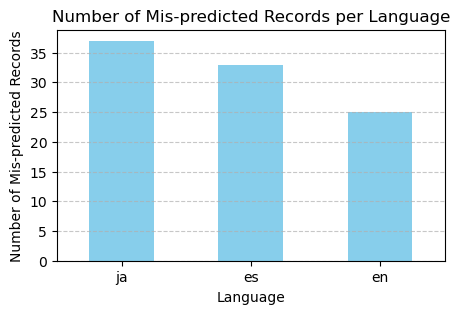

In [13]:
#Plotting a bar graph:
plt.figure(figsize=(5, 3))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Mis-predicted Records per Language')
plt.xlabel('Language')
plt.ylabel('Number of Mis-predicted Records')
plt.xticks(rotation=0)  
#Rotate labels to make them readable
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

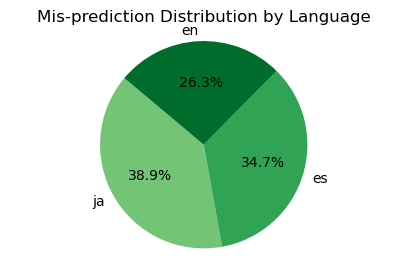

In [14]:
#Choosing shades of green:
colors = ['#74c476', '#31a354', '#006d2c']
#Plotting a pie chart:
plt.figure(figsize=(5, 3))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Mis-prediction Distribution by Language')
plt.axis('equal')  
#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [15]:
#Correct way to add columns for text length to avoid SettingWithCopyWarning
errors_df.loc[:, 'tweet_length'] = errors_df['tweet'].apply(len)
errors_df.loc[:, 'paragraph_length'] = errors_df['paragraph'].apply(len)

In [16]:
#Display basic statistics about text lengths in errors:
print("Error Tweet Length Statistics:")
print(errors_df['tweet_length'].describe())

Error Tweet Length Statistics:
count     95.000000
mean      49.115789
std       21.515884
min       13.000000
25%       37.000000
50%       53.000000
75%       56.000000
max      144.000000
Name: tweet_length, dtype: float64


In [17]:
print("Error paragraph Length Statistics:")
print(errors_df['paragraph_length'].describe())

Error paragraph Length Statistics:
count     95.000000
mean     199.410526
std      205.557648
min       13.000000
25%       63.000000
50%      120.000000
75%      275.500000
max      965.000000
Name: paragraph_length, dtype: float64


Text(0, 0.5, 'Frequency')

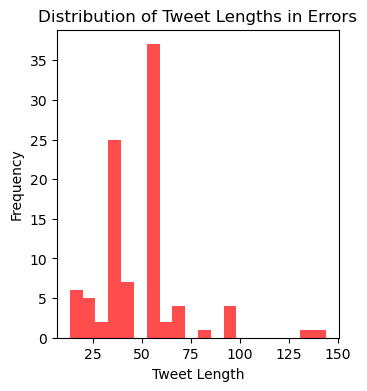

In [18]:
# Visualize the distributions of tweet and article lengths
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.hist(errors_df['tweet_length'], bins=20, color='red', alpha=0.7)
plt.title('Distribution of Tweet Lengths in Errors')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')

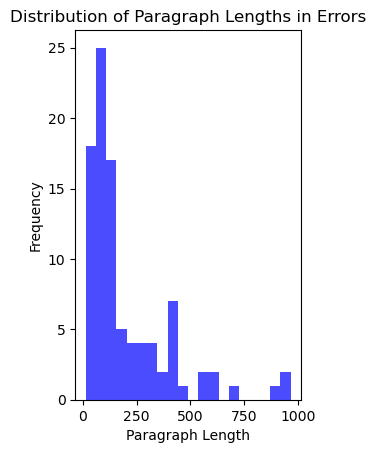

In [19]:
plt.subplot(1, 2, 2)
plt.hist(errors_df['paragraph_length'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Paragraph Lengths in Errors')
plt.xlabel('Paragraph Length')
plt.ylabel('Frequency')
plt.show()

In [20]:
#Print some examples of errors
print("\nExamples of Misclassified Texts:")
errors_df[['tweet', 'paragraph', 'label', 'predicted_label']].head()


Examples of Misclassified Texts:


,tweet,paragraph,label,predicted_label
9,I fucking hate Cristiano Ronaldo. He's so full...,Ronaldo in 2003 and 2017 are two completely di...,1,0
28,でもサンドラ・ブロックは演技が下手だよ、バカ野郎。,『あなたが眠っている間に』は、サンドラ・ブロックをハリウッドの寵児としての地位を確立するのに...,0,1
35,Bill Cosby es un depredador sexual jajaja.,Y la de Bill parece ser que tuvo relaciones se...,0,1
36,Bill Cosby es un depredador sexual jajaja.,Y la de Bill parece ser que tuvo relaciones se...,0,1
140,ビル・コスビーは性犯罪者です（笑）,それは合衆国憲法と呼ばれるもので、たとえ左翼がリンチが失敗に終わったことに腹を立てたとしても...,1,0


In [21]:
# Save the errors to a new CSV file
errors_df.to_csv('mispredicted_examples_para_tweet_only.csv', index=False)

# 2. Paragraphs (Tweet + Paragraph) - Misprediction Analysis

In [22]:
#Load the translated dataset:
data1 = pd.read_csv('para1_translated.csv')

In [23]:
#Load the test with predictions dataset:
data2 = pd.read_csv('ParaLevel_tweet_paragraph_with_predictions.csv')

In [24]:
#Columns to merge on:
col1= 'tweet'
col2= 'paragraph'

In [25]:
#Merge the datasets based on these columns:
merged_data = pd.merge(data2, data1[[col1, col2, 'language']], on=[col1, col2,], how='left')

In [26]:
merged_data.head(5)

,tweet,paragraph,label,predicted_label,language
0,アヴリル・ラヴィーンは醜いし才能がない,ウーマはハリウッドで約 30 年前から活躍していますが、今でも驚異的な容姿をしています。おそ...,0,0,ja
1,マドンナはあの女だ!!!!,やあ、それはすごいですね。,0,0,ja
2,"Nancy grace is a ignorant bitch, how does she ...","If you liked this, please feel free to upvote,...",0,0,en
3,But Sandra Bullock is bad at acting you dumb s...,"In another incident , some firefighters appare...",0,0,en
4,@TuckerCarlson Tucker Carlson is a domestic te...,"A fellow Republican on the Jan. 6 committee, R...",0,0,en


In [27]:
#Total Test Data Size:
merged_data.shape

(4063, 5)

In [28]:
#Create a new column to check if each prediction was correct:
merged_data['correct_prediction'] = merged_data['predicted_label'] == merged_data['label']

In [29]:
#Analyze only the errors:
errors_df = merged_data[merged_data['correct_prediction'] == False].copy()

In [30]:
errors_df.head(5)

,tweet,paragraph,label,predicted_label,language,correct_prediction
9,I fucking hate Cristiano Ronaldo. He's so full...,Ronaldo in 2003 and 2017 are two completely di...,1,0,en,False
140,ビル・コスビーは性犯罪者です（笑）,それは合衆国憲法と呼ばれるもので、たとえ左翼がリンチが失敗に終わったことに腹を立てたとしても...,1,0,ja,False
163,I fucking hate Cristiano Ronaldo. He's so full...,He also helped raise extra money for Erik by d...,0,1,en,False
196,Newt Gingrich está demente; Cawthorn un apósto...,El mandato de Newt Gingrich como presidente de...,1,0,es,False
206,Pero Sandra Bullock es mala actuando como idio...,"De hecho, cuando Bullock tiene un guión que es...",0,1,es,False


In [31]:
#Total number of mis-predictions:
errors_df.shape

(90, 6)

In [32]:
#Count the number of records per language:
language_counts = errors_df['language'].value_counts()

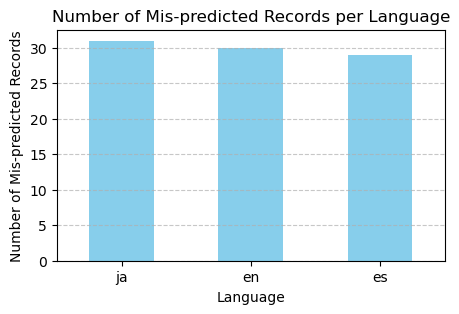

In [33]:
#Plotting a bar graph:
plt.figure(figsize=(5, 3))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Mis-predicted Records per Language')
plt.xlabel('Language')
plt.ylabel('Number of Mis-predicted Records')
plt.xticks(rotation=0)  
#Rotate labels to make them readable
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

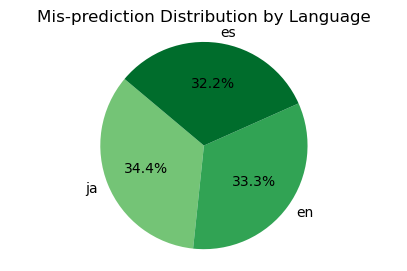

In [34]:
#Choosing shades of green:
colors = ['#74c476', '#31a354', '#006d2c']
#Plotting a pie chart:
plt.figure(figsize=(5, 3))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Mis-prediction Distribution by Language')
plt.axis('equal')  
#Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [35]:
#Correct way to add columns for text length to avoid SettingWithCopyWarning
errors_df.loc[:, 'tweet_length'] = errors_df['tweet'].apply(len)
errors_df.loc[:, 'paragraph_length'] = errors_df['paragraph'].apply(len)

In [36]:
#Display basic statistics about text lengths in errors:
print("Error Tweet Length Statistics:")
print(errors_df['tweet_length'].describe())

Error Tweet Length Statistics:
count    90.000000
mean     47.688889
std      18.211396
min      13.000000
25%      37.000000
50%      53.000000
75%      56.000000
max      97.000000
Name: tweet_length, dtype: float64


In [37]:
print("Error paragraph Length Statistics:")
print(errors_df['paragraph_length'].describe())

Error paragraph Length Statistics:
count      90.000000
mean      222.922222
std       217.966507
min        13.000000
25%        76.500000
50%       137.000000
75%       277.750000
max      1056.000000
Name: paragraph_length, dtype: float64


Text(0, 0.5, 'Frequency')

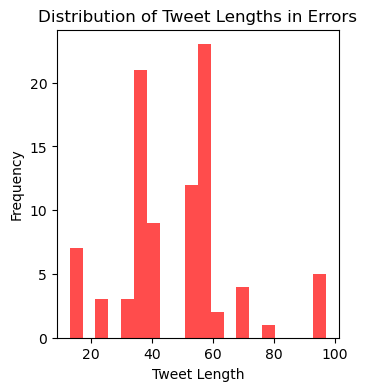

In [38]:
# Visualize the distributions of tweet and article lengths
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.hist(errors_df['tweet_length'], bins=20, color='red', alpha=0.7)
plt.title('Distribution of Tweet Lengths in Errors')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')

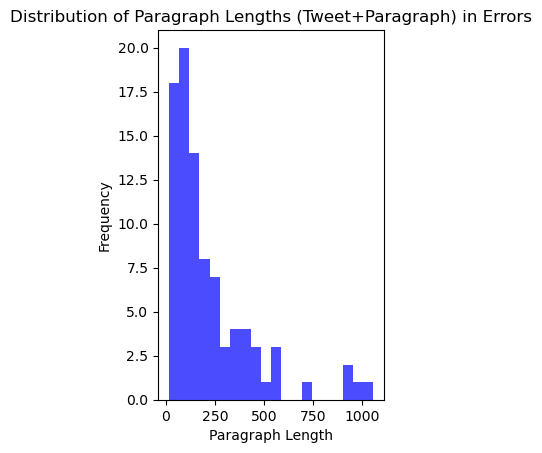

In [39]:
plt.subplot(1, 2, 2)
plt.hist(errors_df['paragraph_length'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Paragraph Lengths (Tweet+Paragraph) in Errors')
plt.xlabel('Paragraph Length')
plt.ylabel('Frequency')
plt.show()

In [40]:
#Print some examples of errors
print("\nExamples of Misclassified Texts:")
errors_df[['tweet', 'paragraph', 'label', 'predicted_label']].head()


Examples of Misclassified Texts:


,tweet,paragraph,label,predicted_label
9,I fucking hate Cristiano Ronaldo. He's so full...,Ronaldo in 2003 and 2017 are two completely di...,1,0
140,ビル・コスビーは性犯罪者です（笑）,それは合衆国憲法と呼ばれるもので、たとえ左翼がリンチが失敗に終わったことに腹を立てたとしても...,1,0
163,I fucking hate Cristiano Ronaldo. He's so full...,He also helped raise extra money for Erik by d...,0,1
196,Newt Gingrich está demente; Cawthorn un apósto...,El mandato de Newt Gingrich como presidente de...,1,0
206,Pero Sandra Bullock es mala actuando como idio...,"De hecho, cuando Bullock tiene un guión que es...",0,1


In [41]:
# Save the errors to a new CSV file
errors_df.to_csv('mispredicted_examples_para_Tweet_and_Paragraph.csv', index=False)

# 3. Articles (Tweet) - Misprediction Analysis

In [42]:
#Load the translated dataset:
data1 = pd.read_csv('articles_translated.csv')

In [43]:
#Load the test with predictions dataset:
data2 = pd.read_csv('ArticleLevel_TweetOnly_test_with_predictions.csv')

In [44]:
#Columns to merge on:
col1= 'tweet'
col2= 'article'

In [45]:
#Merge the datasets based on these columns:
merged_data = pd.merge(data2, data1[[col1, col2, 'language']], on=[col1, col2,], how='left')

In [46]:
merged_data.head(5)

,tweet,article,label,predicted_label,language
0,O değersiz orospu Jesy Nelson'ın takip ettiği ...,Nicki Minaj'ın tamamen çöp müziğe sahip olduğu...,0,0,tr
1,Justin Trudeau est une figure de proue inutile...,"EN octobre, les électeurs canadiens auront la ...",0,0,fr
2,إذن، حسب منطقك، الرئيس السابق جيمي كارتر إرهاب...,قطعاً. من مركز التجارة العالمي إلى هجمات الغاز...,0,0,ar
3,lebron james es una azada,Excepto por el período en que Kobe y Shaquille...,0,0,es
4,Newt Gingrich is demented; Cawthorn a mindless...,It's tough to use the GOP debates as a measure...,0,1,en


In [47]:
#Total Test Data Size:
merged_data.shape

(5037, 5)

In [48]:
#Create a new column to check if each prediction was correct:
merged_data['correct_prediction'] = merged_data['predicted_label'] == merged_data['label']

In [49]:
#Analyze only the errors:
errors_df = merged_data[merged_data['correct_prediction'] == False].copy()

In [50]:
errors_df.head(5)

,tweet,article,label,predicted_label,language,correct_prediction
4,Newt Gingrich is demented; Cawthorn a mindless...,It's tough to use the GOP debates as a measure...,0,1,en,False
131,"@GeorgeTakei Melania, seperti Donald Trump, ad...",Keegoisan adalah ciri khas Trump. Segala sesua...,0,1,id,False
137,यह जरूर कोई काली बकवास होगी। डोजा कैट्ट ने इस ...,मुझें नहीं पता। मैं रॉक का प्रशंसक हूं और मैं ...,1,0,hi,False
174,те мемы о Джастине Бибере примерно в 2011 году...,"Певец Джастин Бибер, возможно, очень талантлив...",0,1,ru,False
342,@TMZ クリッシー・テイゲンは計算高い女です。楽しみのために毎日彼女をファックし、日曜日に...,クリッシー・テイゲンの言動がすべてひどいというわけではない。時々、彼女は何か興味深いことを言...,0,1,ja,False


In [51]:
#Total number of mis-predictions:
errors_df.shape

(95, 6)

In [52]:
#Count the number of records per language:
language_counts = errors_df['language'].value_counts()

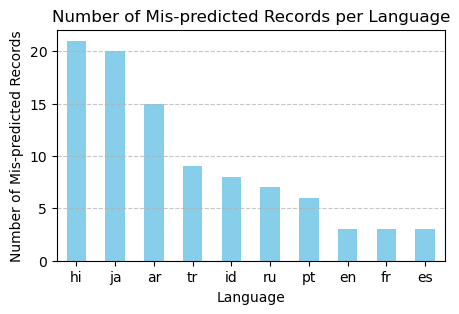

In [53]:
#Plotting a bar graph:
plt.figure(figsize=(5, 3))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Mis-predicted Records per Language')
plt.xlabel('Language')
plt.ylabel('Number of Mis-predicted Records')
plt.xticks(rotation=0)  # Rotate labels to make them readable
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

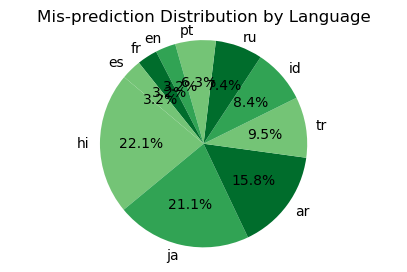

In [54]:
#Choosing shades of green:
colors = ['#74c476', '#31a354', '#006d2c']
#Plotting a pie chart:
plt.figure(figsize=(5, 3))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Mis-prediction Distribution by Language')
plt.axis('equal')  
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [57]:
#Correct way to add columns for text length to avoid SettingWithCopyWarning
errors_df.loc[:, 'tweet_length'] = errors_df['tweet'].apply(len)
errors_df.loc[:, 'article_length'] = errors_df['article'].apply(len)

In [56]:
# # Save the errors to a new CSV file
# errors_df.to_csv('mispredicted_examples.csv', index=False)

In [58]:
#Display basic statistics about text lengths in errors:
print("Error Tweet Length Statistics:")
print(errors_df['tweet_length'].describe())

Error Tweet Length Statistics:
count     95.000000
mean      91.105263
std       60.844845
min       14.000000
25%       51.000000
50%       78.000000
75%      124.000000
max      365.000000
Name: tweet_length, dtype: float64


In [59]:
print("Error article Length Statistics:")
print(errors_df['article_length'].describe())

Error article Length Statistics:
count       95.000000
mean      4525.484211
std       5173.469883
min        182.000000
25%       1408.500000
50%       2474.000000
75%       6338.500000
max      26607.000000
Name: article_length, dtype: float64


Text(0, 0.5, 'Frequency')

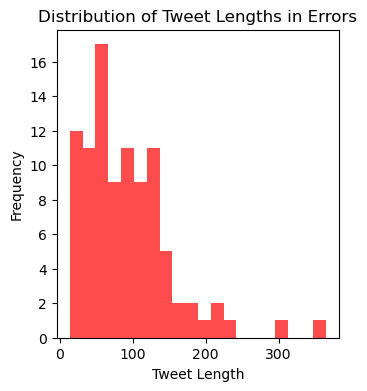

In [60]:
# Visualize the distributions of tweet and article lengths
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.hist(errors_df['tweet_length'], bins=20, color='red', alpha=0.7)
plt.title('Distribution of Tweet Lengths in Errors')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')

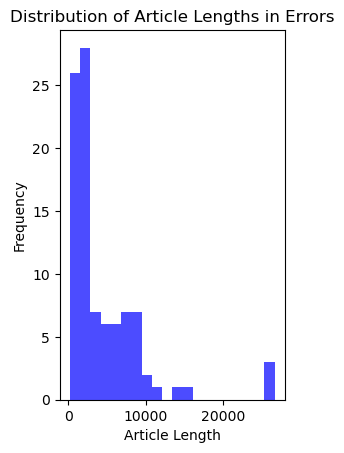

In [61]:
plt.subplot(1, 2, 2)
plt.hist(errors_df['article_length'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Article Lengths in Errors')
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.show()

In [62]:
#Print some examples of errors
print("\nExamples of Misclassified Texts:")
errors_df[['tweet', 'article', 'label', 'predicted_label']].head()


Examples of Misclassified Texts:


,tweet,article,label,predicted_label
4,Newt Gingrich is demented; Cawthorn a mindless...,It's tough to use the GOP debates as a measure...,0,1
131,"@GeorgeTakei Melania, seperti Donald Trump, ad...",Keegoisan adalah ciri khas Trump. Segala sesua...,0,1
137,यह जरूर कोई काली बकवास होगी। डोजा कैट्ट ने इस ...,मुझें नहीं पता। मैं रॉक का प्रशंसक हूं और मैं ...,1,0
174,те мемы о Джастине Бибере примерно в 2011 году...,"Певец Джастин Бибер, возможно, очень талантлив...",0,1
342,@TMZ クリッシー・テイゲンは計算高い女です。楽しみのために毎日彼女をファックし、日曜日に...,クリッシー・テイゲンの言動がすべてひどいというわけではない。時々、彼女は何か興味深いことを言...,0,1


In [64]:
# Save the errors to a new CSV file
errors_df.to_csv('mispredicted_examples_article_Tweet_only.csv', index=False)